# **Convolutional Neural Networks (CNN) - Image Classification**

- Meaning - a coil or twist, especially one of many

- Predominantly used for image classification

- https://poloclub.github.io/cnn-explainer/

- Data Set (Binary Classification):
 - https://www.kaggle.com/datasets/tongpython/cat-and-dog

- GPU not required but highly recommended
 - If you do not have access to a GPU, https://colab.research.google.com has them for free
 - Check GPU status `!nvidia-smi` from within colab notebook
 -Colab Notebook is basically Jupyter in the Cloud hosted by Google
 - If no GPU
   - `NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
`
- Look to the bottom of this section to find instruction on connecting your notebook to Kaggle and downloading datasets directly


### **What is a CNN**

- A deep learning neural network that can find patterns within complex and large matrices of data

- CNN can deal with 1D, 2D and 3D datasets

- 1D CNN's are most often used for Regression problems (rare)

- 2D CNN's are most often used for image classification (common)

- 3D CNN's are most often used for geometric probability

  #### Pros

  - Actually learns about the data

  - Can handle Gigabytes of data

  - Does really well with image detection

  - Lots of tuning parameters

  #### Cons

  - Lots of tuning parameters

  - CPU intensive, basically it requires a dedicated processor to get any real results (GPU)

  - Slow with long training periods

### **How does it work with Images**

- An image is a 3 Layer, 2 Dimensional Array

- The layers are Colors, Red, Green and Blue

- Each Layer is a 2 dimensional array

- Each 2 dimensional array is a matrix of values

- Each image is of a different size and shape so we could have an image matrix of 512 columns by 512 rows and each cell contains a matrix of it's own representing the Red Blue Green color spectrum

  #### The Process

  - All the images are converted into a matrix format and then normalized to be between 0 and 1

  - Once Normalized the Convolutional Neural Network will have it's own mini-matric (kernel size) that will sweep through the larger image matrix

  - With each pass the data is summarized and then the mini-matrix moves on to the next batch of data in the matrix (strides determine the pace of how the mini-matrix moves within the larger image matrix)

### **Getting the Data**

Data Set (Binary Classification):

- https://www.kaggle.com/datasets/salader/dogs-vs-cats

Data Set (Multi-category Classification):

- https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

If you need instructions to connect to [Kaggle from Google Colab](#kaggle)

### **Train Test and Split Method for CNN**

- We are working with images and folders, therefore it is better to have the images split up into their respective categories before beginning

- The `train` and `test` folder should contain a folder with each of the categories

- Since we have random shapes and sizes, we need to size them uniformly and label them according to their folder labels so we know what the outcomes should be (X_train, X_test, y_train, y_test)

Training Data

```
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    batch_size=32,
    target_size=(256, 256),
    shuffle=True,
)
```

Test Data

```
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    batch_size=32,
    target_size=(256, 256),
    shuffle=True,
)
```


### **Building the CNN Model**

  Terms

  - `filters` - Number of initial output filters, generally starts with 32 or 64
  - `kernel_size` - Height and Width of the convolution window, 1x1, 2x2 or 3x3; (3,3) or 3 is most common
  - `strides` - How many steps to take per convolution
  - `padding`
  - `valid`  means no padding so the image dataset will shrink per pass
  - `same` adds padding to the edges to preserve the full image dataset
  - `activation` - What math function to apply to each filter
  - `input_shape` - On first layer only -> Must match the `image_size` from the training/testing dataset and append the number of layers

  Convolutional Layer Configuration

  ```
  tf.keras.layers.Conv2D(
      filters = 32,
      kernel_size = 3,
      strides= 1,
      padding='valid',
      activation='relu,
  )
  ```

  Shorthand Configuration

  `Conv2D(32, 3, activation='relu')`

  #### Full Convolutional Neural Network

  ```
  # First Layer (includes input shaper)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

  # Pooling layer (optional) condenses information
  model.add(layers.MaxPooling2D(()))

  # The two together are known as a block
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(()))

  # Add as many blocks as desired
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(()))

  # Requirement to flatten from a multi-dimensional array to a single dimension
  model.add(layers.Flatten())

  # Add the final output layer
  model.add(layers.Dense(1, activation='sigmoid')) 

  # Compile Layer
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Fit the model
  model.fit(train_data, validation_data=test_data, epochs=5) 
  ```

  #### Model Summary

  ```
    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_14 (Conv2D)           (None, 29, 29, 32)        1568      
    _________________________________________________________________
    max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
    _________________________________________________________________
    conv2d_15 (Conv2D)           (None, 11, 11, 32)        16416     
    _________________________________________________________________
    max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
    _________________________________________________________________
    flatten_3 (Flatten)          (None, 800)               0         
    _________________________________________________________________
    dense_6 (Dense)              (None, 32)                25632     
    _________________________________________________________________
    dense_7 (Dense)              (None, 10)                330       
    =================================================================
    Total params: 43,946
    Trainable params: 43,946
    Non-trainable params: 0

  ```

### **Validation of Data**

  Get an Accuracy Score against the test data

  `model.evaluate(test_data)`

  Plot Loss vs Validation Loss

  `pd.DataFrame(model.history.history).plot()`

  As traditional ways go we can also use confusion matrices and classification reports however this is much more difficult to assess


#### Predicting Real Data

  This requires that we pre-process images before we can run a prediction against them

  PreProcessor

  ```
  def preprocessor(filename,img_shape=256):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img
  ```

  If we want to pick a random image 

  ```
  def random_image(path):
      image = random.choice(os.listdir(path))
      return path + image   
  ```

  If we want to plot the image

  ```
  def plot_image(image):
    img = mpimg.imread(image)
    plt.imshow(img)
  ```

  Classification Report and Confusion Matrix Generator
  ```
pred_true = []
y_true = []

def predictor(path, image):
  target = path + '/' +image
  img = tf.io.read_file(target)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [256,256])
  img = img/255.0
  pred = ((model_4.predict(tf.expand_dims(img, axis=0)) > 0.5) * 1)

  pred_true.append(pred[0][0])
  if 'cat' in image:
    y_true.append(0)
  else:
    y_true.append(1)

i = 0
for path, dirs, files in os.walk('dogs_vs_cats/test'):
    
    if len(dirs) == 0:
      for file in files:
        predictor(path, file)

  ```

### **Tuning ideas**

  Here are some options that we can take action on right away

  - Increase/Decrease layers
  - Increase/Decrease the number of units per layer
  - Change the activation functions
  - Change the optimization function
  - Change the learning rate
  - Fit on more data
  - Change the data (Augmentation)
  - Transfer Learning...

#### Augmenting Data

Changing the original shape of the data to train on a wider set of parameters giving more learning opportunities to the model

Will take longer because the augmentation happens on the fly

```
train_data_augmented = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.9,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
```

### **Tracking results**

- Use Tensorboard to track iterations

- Tensorboard is a callback that will record and keep all results from every fit that it is used on

- This will automate the process of tracking results per test iteration

#### Tensorboard Setup

```
from tensorflow.keras.callbacks import Tensorboard
import datetime

tensorboard_callback = lambda name : TensorBoard(log_dir='tb_logs/' + name + '_' + datetime.datetime.now().strftime('%Y%m%d-%H:%M:%S'))

model.fit(train_data, validation_data=test_data, epochs=5, callbacks=[tensorboard_callback('description')]
```

#### Accessing Tensorboard from within google colab Google Colab

This process has some integration with your personal google account so be careful

When activating this step you will be asked to login to your google account and provide a key to be used to activate your tensorboard

Be careful because this will be public, it is not private

DO NOT UPLOAD Sensitive information here

For sensitive information download the 

```
!tensorboard dev upload --logdir ./tf_dir/ \
--name 'Name of Tensorboard' \
--description 'Description of the Tensorboard' \
--one_shot
```

#### Show the TensorBoards that are active

`!tensorboard dev list`

#### Delete the TensorBoard Instances

`!tensorboard dev delete --experiment EXP_ID`

<a name="kaggle"></a>
## Kaggle and Colab Integration


Step One: Kaggle Steps
In your Kaggle Account, Go to your account and Create A New API Key

Step Two: Google Colab Steps
```
# Kaggle on Colab setup

!pip install -q kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# open the json file you downloaded and paste the string on this line
api_token = {"username":"username","key":"key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
```

### Download the dataset
```
!kaggle datasets download -d tongpython/cat-and-dog
!kaggle datasets download -d gpiosenka/sports-classification
```

If you're still having trouble check out this link:

https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

# GPU Status

`!nvidia-smi`

In [ ]:
!nvidia-smi

Sun Jul 10 09:00:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Implement Kaggle with Google Colab Connection

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# open the json file you downloaded and paste the string on this line
api_token = {"username":"username","key":"key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 93% 203M/218M [00:01<00:00, 117MB/s]
100% 218M/218M [00:01<00:00, 150MB/s]


# Unzip Files

In [ ]:
import zipfile

uz = zipfile.ZipFile('cat-and-dog.zip')
uz.extractall()
uz.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

import os
import random

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check out the Data

Google Colab folder navigation is slow so let's create our own method to check out the data

- Get Random images from the folders
- Get information about the image (shape and numeric data)
- Show the image (plot the image)

In [ ]:
# Let's the how many files we're dealing with

for directory, folders, filenames in os.walk('test_set'):
  print(f'{directory}, {folders}, {len(filenames)}')


test_set, ['test_set'], 0
test_set/test_set, ['cats', 'dogs'], 0
test_set/test_set/cats, [], 1011
test_set/test_set/dogs, [], 1012


In [ ]:
!rm -rf 'test_set/test_set/cats/.ipynb_checkpoints/'

dog.3993.jpg


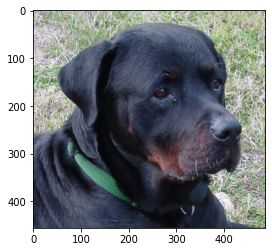

In [ ]:
path = 'training_set/training_set/'
category = 'dogs'

target = path + category

image = random.choice(os.listdir(target))
print(image)

img = mpimage.imread(target + '/' + image)
# print(img.shape, img )

plt.imshow(img)

# Shapes of the images are not the same size - something we have to remember

# Normalize and Train Test Split (for images)

For Normalizing and creating our training/testing datasets, we don't create them in advance because that would take up too much memory

Instead what we do is use a function that feeds our data into the TensorFlow Model

Normalizing Data is done with ImageDataGenerator

Breaking up the images and resizing them is done with ImageDataGenerator's `flow_from_directory` function

In [ ]:
# We are going to create a Generator function that feeds in information to the Neural Network
# This means we cannot see the live data and we cannot get the labels in advance


# X_train, y_train, X_test, y_test
# We used to deal with datasets that we could keep in memory


train_dir = 'training_set/training_set/'
test_dir = 'test_set/test_set/'

# Rescale our images
# This does not rescale the images right away
# Images are rescaled as they are fed into the neural network

train_data_generator = ImageDataGenerator(
    rescale=1./255 # this enforeces a float32 value for the data type
    ) 
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

# Flow from directory and batch our images together

train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
)

# Shorthand options with the Test data
test_data = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(256,256),
    class_mode='binary'
)






Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
len(train_data)

251

In [ ]:
len(test_data)

64

In [ ]:
print(8005/32)

250.15625


In [ ]:
print(2023/32)

63.21875


In [ ]:
# Generators which is the function type used for feeding information into a CNN
# Never STOP!

# for index, item in enumerate(test_data):
#   print(index)

image, label = test_data.next()
len(image)
label

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

# Create our first Model

In this example we will create a Dense Model, the exact same kind we created for Regression and Classification

This one will be tailored for Binary Classification

This is not a CNN but aimed to show the why we would want to use CNN's over the traditional Model

In [ ]:
model_1 = Sequential()

# We receive a 3 dimensional array - 256,256, 3 rgb
# But really this is a 4D array - Batch Size, 256, 256, 3
model_1.add(Dense(128, activation='relu'))


model_1.add(Dense(128, activation='relu'))


model_1.add(Dense(128, activation='relu'))

model_1.add(Flatten())

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# model_1.build(input_shape=(256,256,3))

history_1 = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_1_dense')]
)

Epoch 1/5
251/251 [==============================] - 105s 413ms/step - loss: 1.0177 - accuracy: 0.5861 - val_loss: 0.6603 - val_accuracy: 0.6204
Epoch 2/5
251/251 [==============================] - 106s 420ms/step - loss: 0.6580 - accuracy: 0.6140 - val_loss: 0.6837 - val_accuracy: 0.6159
Epoch 3/5
251/251 [==============================] - 106s 421ms/step - loss: 0.6438 - accuracy: 0.6281 - val_loss: 0.6653 - val_accuracy: 0.6095
Epoch 4/5
251/251 [==============================] - 106s 420ms/step - loss: 0.6420 - accuracy: 0.6272 - val_loss: 0.6983 - val_accuracy: 0.5734
Epoch 5/5
251/251 [==============================] - 105s 419ms/step - loss: 0.6321 - accuracy: 0.6311 - val_loss: 0.7053 - val_accuracy: 0.5927


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (256, 256, 128)           512       
                                                                 
 dense_22 (Dense)            (256, 256, 128)           16512     
                                                                 
 dense_23 (Dense)            (256, 256, 128)           16512     
                                                                 
 flatten_1 (Flatten)         (256, 32768)              0         
                                                                 
 dense_24 (Dense)            (256, 1)                  32769     
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (256, 256, 128)           512       
                                                                 
 dense_26 (Dense)            (256, 256, 128)           16512     
                                                                 
 dense_27 (Dense)            (256, 256, 128)           16512     
                                                                 
 dense_28 (Dense)            (256, 256, 1)             129       
                                                                 
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_losses(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.plot(loss, label='loss')
  plt.plot(val_loss, label='val_loss')
  plt.legend()
  plt.title('losses')

  plt.figure()
  plt.plot(accuracy, label='accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.legend()
  plt.title('Accuracies')

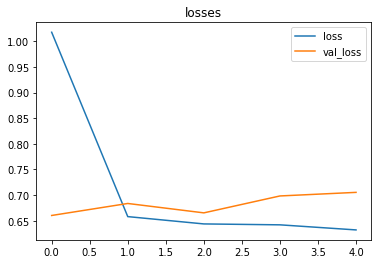

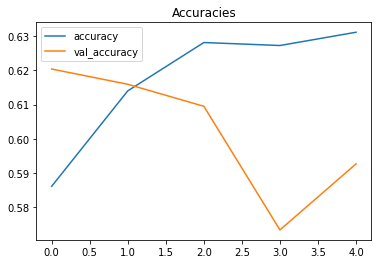

In [ ]:
plot_losses(history_1)

# TensorBoard

Before we build our official CNN we should have a method to track the many interations we are going to create

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

tb = lambda desc : TensorBoard(
    log_dir='tf_logs/' \
    + desc \
    + '_' \
    + datetime.datetime.now().strftime('%Y%m%d_%H:%M:%S'))

# Our First CNN Model!

This will be modeled after the CNN Explainer site from above

In [ ]:
model_2 = Sequential()

# On the first layer of any CNN or multi-dimensional NN
#  we have to specify the input shape

# Layer 1 with Activation
model_2.add(Conv2D(
    filters=32,
    kernel_size=3,
    strides=(1, 1),
    padding='valid',
    activation='relu',
    input_shape=(256,256,3)
))

# Shorthand of the above - no need for input shape b/c we set it already

# Layer 2 with activation
model_2.add(Conv2D(32, 3, activation='relu'))

# Layer 3
model_2.add(MaxPool2D(2))

# Layer 4
model_2.add(Conv2D(32, 3, activation='relu'))

# Layer 5
model_2.add(Conv2D(32, 3, activation='relu'))

# Layer 6
model_2.add(MaxPool2D(2))


model_2.add(Flatten())

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



model_2.build(input_shape=(256,256,3))


history_2 = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_2_cnn')]
)

Epoch 1/5
251/251 [==============================] - 54s 173ms/step - loss: 0.6518 - accuracy: 0.5950 - val_loss: 0.6005 - val_accuracy: 0.6574
Epoch 2/5
251/251 [==============================] - 41s 162ms/step - loss: 0.5613 - accuracy: 0.7141 - val_loss: 0.5501 - val_accuracy: 0.7261
Epoch 3/5
251/251 [==============================] - 41s 162ms/step - loss: 0.4747 - accuracy: 0.7741 - val_loss: 0.5452 - val_accuracy: 0.7232
Epoch 4/5
251/251 [==============================] - 41s 162ms/step - loss: 0.3570 - accuracy: 0.8407 - val_loss: 0.6093 - val_accuracy: 0.7375
Epoch 5/5
251/251 [==============================] - 41s 162ms/step - loss: 0.2323 - accuracy: 0.9049 - val_loss: 0.7533 - val_accuracy: 0.7286


In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                 

In [ ]:
# Padding is 'same'

model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                 

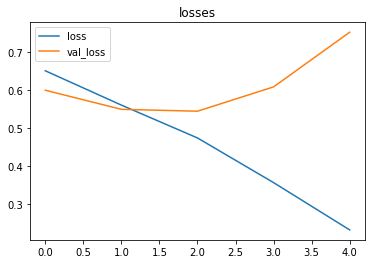

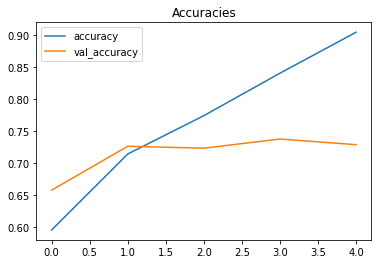

In [ ]:
plot_losses(history_2)

# Our Second Model (Tuning by Reducing Layers)

Using the first model as a base, we will remove a Conv2D layer per block

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(32,3, activation='relu', input_shape=(256,256,3)))
model_3.add(MaxPool2D())

model_3.add(Conv2D(32,3, activation='relu'))
model_3.add(MaxPool2D())

model_3.add(Flatten())

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_3_cnn_2_conv2d')]
)

Epoch 1/5
251/251 [==============================] - 36s 140ms/step - loss: 0.6686 - accuracy: 0.5911 - val_loss: 0.6532 - val_accuracy: 0.6451
Epoch 2/5
251/251 [==============================] - 36s 143ms/step - loss: 0.5882 - accuracy: 0.6898 - val_loss: 0.5817 - val_accuracy: 0.6965
Epoch 3/5
251/251 [==============================] - 35s 138ms/step - loss: 0.5642 - accuracy: 0.7136 - val_loss: 0.5953 - val_accuracy: 0.6930
Epoch 4/5
251/251 [==============================] - 35s 140ms/step - loss: 0.4730 - accuracy: 0.7748 - val_loss: 0.6443 - val_accuracy: 0.6658
Epoch 5/5
251/251 [==============================] - 35s 139ms/step - loss: 0.3564 - accuracy: 0.8422 - val_loss: 0.7129 - val_accuracy: 0.6560


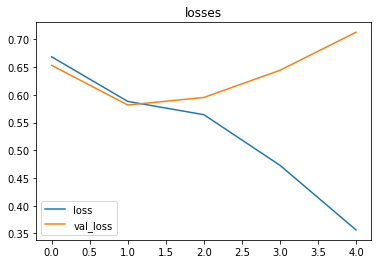

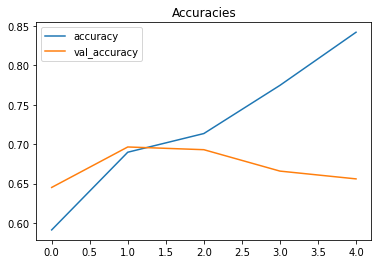

In [ ]:
plot_losses(history_3)

# Our Third Model (Tuning by Reducing Filter Units)

Using the first model as a base, we will reduce our Filter units from 32 to 16

In [ ]:
model_4 = Sequential()

model_4.add(Conv2D(16,3, activation='relu', input_shape=(256,256,3)))
model_4.add(Conv2D(16,3, activation='relu'))
model_4.add(MaxPool2D())

model_4.add(Conv2D(16,3, activation='relu'))
model_4.add(Conv2D(16,3, activation='relu'))
model_4.add(MaxPool2D())

model_4.add(Flatten())

model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_4 = model_4.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_4_16_units')]
)

Epoch 1/5
251/251 [==============================] - 38s 148ms/step - loss: 0.6749 - accuracy: 0.5559 - val_loss: 0.6188 - val_accuracy: 0.6372
Epoch 2/5
251/251 [==============================] - 37s 147ms/step - loss: 0.6062 - accuracy: 0.6646 - val_loss: 0.5859 - val_accuracy: 0.6792
Epoch 3/5
251/251 [==============================] - 40s 158ms/step - loss: 0.5378 - accuracy: 0.7269 - val_loss: 0.5652 - val_accuracy: 0.6965
Epoch 4/5
251/251 [==============================] - 36s 145ms/step - loss: 0.4408 - accuracy: 0.7906 - val_loss: 0.5361 - val_accuracy: 0.7281
Epoch 5/5
251/251 [==============================] - 40s 159ms/step - loss: 0.3309 - accuracy: 0.8530 - val_loss: 0.6293 - val_accuracy: 0.7173


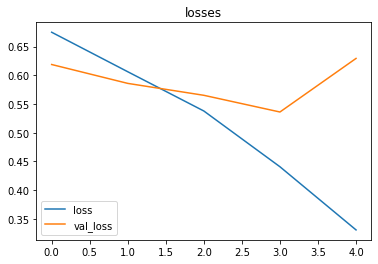

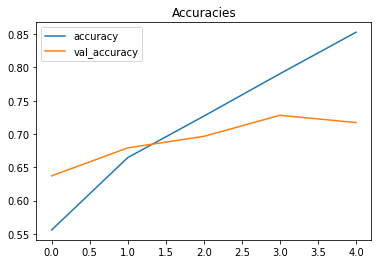

In [ ]:
plot_losses(history_4)

# Our Fourth Model (Tuning by Combining the third and fourth model)

This time using the first model as a base, we will remove a Conv2D layer from each block and reduce the filter units to 8

In [ ]:
model_5 = Sequential()

model_5.add(Conv2D(8, 3, activation='relu', input_shape=(256,256,3)))
model_5.add(MaxPool2D())

model_5.add(Conv2D(8,3, activation='relu'))
model_5.add(MaxPool2D())

model_5.add(Flatten())

model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_5 = model_5.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_5_8units_2conv')]
)

Epoch 1/5
251/251 [==============================] - 36s 139ms/step - loss: 0.6843 - accuracy: 0.5736 - val_loss: 0.6107 - val_accuracy: 0.6560
Epoch 2/5
251/251 [==============================] - 38s 153ms/step - loss: 0.5822 - accuracy: 0.6972 - val_loss: 0.5837 - val_accuracy: 0.6787
Epoch 3/5
251/251 [==============================] - 33s 132ms/step - loss: 0.5136 - accuracy: 0.7482 - val_loss: 0.6263 - val_accuracy: 0.6520
Epoch 4/5
251/251 [==============================] - 33s 133ms/step - loss: 0.4582 - accuracy: 0.7795 - val_loss: 0.5971 - val_accuracy: 0.6925
Epoch 5/5
251/251 [==============================] - 33s 133ms/step - loss: 0.3967 - accuracy: 0.8212 - val_loss: 0.6449 - val_accuracy: 0.6886


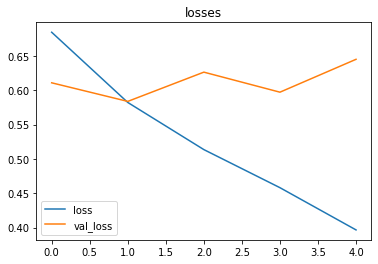

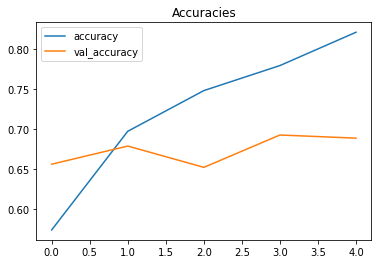

In [ ]:
plot_losses(history_5)

# Our Fifth Model (Augmenting Data)

For this example we will clone the first model

And we will use an augmented Data set to feed into our model

In [ ]:
train_data_generator = ImageDataGenerator(
    rescale=1./255 # this enforeces a float32 value for the data type
    ) 

train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
)


train_data_aug_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
)

train_data_aug = train_data_aug_generator.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
)





Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [ ]:
image, label = train_data.next()
image_aug, label_aug = train_data_aug.next()

In [ ]:

def aug_images(img1, img2):
  plt.imshow(img1)
  plt.figure()
  plt.imshow(img2)

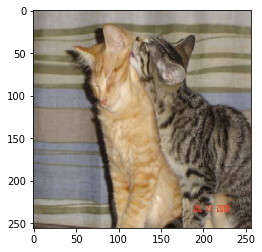

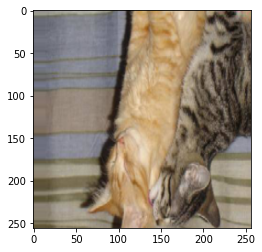

In [ ]:
aug_images(image[0], image_aug[0])

In [ ]:
model_6 = Sequential()

model_6.add(Conv2D(16, 3, activation='relu', input_shape=(256,256,3)))
model_6.add(Conv2D(16, 3, activation='relu'))
model_6.add(MaxPool2D())

model_6.add(Conv2D(16, 3, activation='relu'))
model_6.add(Conv2D(16, 3, activation='relu'))
model_6.add(MaxPool2D())

model_6.add(Flatten())

model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history_6 = model_6.fit(
    train_data_aug,
    validation_data=test_data,
    epochs=5,
    callbacks=[tb('model_6_aug_data')]
  
)


Epoch 1/5
251/251 [==============================] - 133s 529ms/step - loss: 0.6927 - accuracy: 0.5357 - val_loss: 0.6831 - val_accuracy: 0.5848
Epoch 2/5
251/251 [==============================] - 130s 517ms/step - loss: 0.6741 - accuracy: 0.5841 - val_loss: 0.6660 - val_accuracy: 0.6065
Epoch 3/5
251/251 [==============================] - 130s 518ms/step - loss: 0.6718 - accuracy: 0.5973 - val_loss: 0.6643 - val_accuracy: 0.6253
Epoch 4/5
251/251 [==============================] - 129s 514ms/step - loss: 0.6595 - accuracy: 0.6185 - val_loss: 0.6524 - val_accuracy: 0.6515
Epoch 5/5
251/251 [==============================] - 129s 512ms/step - loss: 0.6494 - accuracy: 0.6292 - val_loss: 0.6218 - val_accuracy: 0.6629


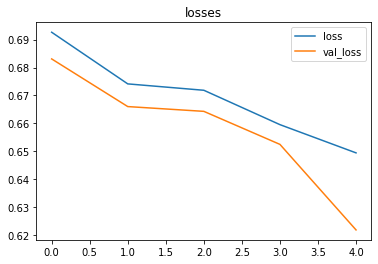

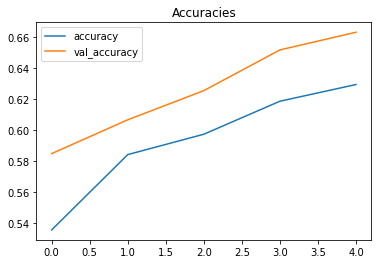

In [ ]:
plot_losses(history_6)

# Viewing our Model Results in TensorBoard

There are a few steps involved here

This is hosted on a Publicly Accessible Google TensorBoard instance

When telling TensorBoard to upload our data, we have to authorize it from our google account

In [ ]:
!tensorboard dev upload --logdir ./tf_logs

# Getting Predictions for our data

There is no easy way to pull the labels from the test data since it is a Batch process with a generator

Predicted [[0]]


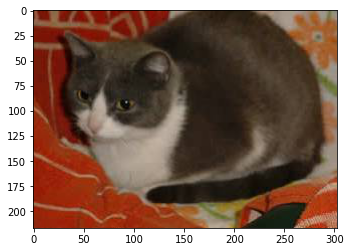

In [ ]:
path = 'training_set/training_set/'
category = 'cats'

target = path + category

image = random.choice(os.listdir(target))
real_image = mpimage.imread(target + '/' + image)



img = tf.io.read_file(target + '/' + image)
img = tf.io.decode_image(img)
img = tf.image.resize(img, size=[256,256])
img = img/255.

pred = (model_2.predict(tf.expand_dims(img, axis=0)) > 0.5) * 1
print('Predicted', pred)

plt.imshow(real_image)


In [ ]:
test_data.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
y_test = []
preds = []


def predictor(path, image):

  target = path + '/' + image

  print(target)
  img = tf.io.read_file(target)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, size=[256,256])
  img = img/255.
  
  pred = (model_2.predict(tf.expand_dims(img, axis=0)) > 0.5) * 1
  preds.append(pred[0][0])

  if 'cats' in path:
    y_test.append(0)
  else:
    y_test.append(1)






([], [])

In [ ]:
predictor(path + category, image)

training_set/training_set/cats/cat.2281.jpg


In [ ]:
y_test, preds

([0], [0])

In [ ]:
for path, dirs, files in os.walk('test_set/test_set/'):
    if len(dirs) == 0:
      for file in files:
        predictor(path, file)
        # print(file, path)

test_set/test_set/cats/cat.4446.jpg
test_set/test_set/cats/cat.4593.jpg
test_set/test_set/cats/cat.4323.jpg
test_set/test_set/cats/cat.4738.jpg
test_set/test_set/cats/cat.4389.jpg
test_set/test_set/cats/cat.4747.jpg
test_set/test_set/cats/cat.4153.jpg
test_set/test_set/cats/cat.4856.jpg
test_set/test_set/cats/cat.4026.jpg
test_set/test_set/cats/cat.4161.jpg
test_set/test_set/cats/cat.4982.jpg
test_set/test_set/cats/cat.4664.jpg
test_set/test_set/cats/cat.4704.jpg
test_set/test_set/cats/cat.4213.jpg
test_set/test_set/cats/cat.4972.jpg
test_set/test_set/cats/cat.4820.jpg
test_set/test_set/cats/cat.4049.jpg
test_set/test_set/cats/cat.4872.jpg
test_set/test_set/cats/cat.4058.jpg
test_set/test_set/cats/cat.4156.jpg
test_set/test_set/cats/cat.4055.jpg
test_set/test_set/cats/cat.4123.jpg
test_set/test_set/cats/cat.4248.jpg
test_set/test_set/cats/cat.4662.jpg
test_set/test_set/cats/cat.4180.jpg
test_set/test_set/cats/cat.4910.jpg
test_set/test_set/cats/cat.4091.jpg
test_set/test_set/cats/cat.4

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[758 254]
 [287 725]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1012
           1       0.74      0.72      0.73      1012

    accuracy                           0.73      2024
   macro avg       0.73      0.73      0.73      2024
weighted avg       0.73      0.73      0.73      2024

